In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

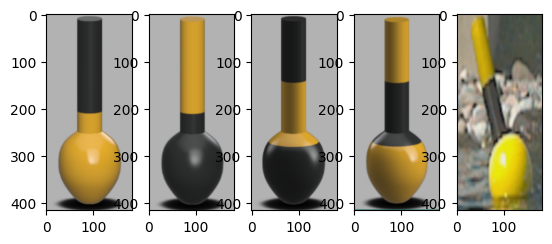

In [29]:
north = cv2.imread('../data/ground_truth/north.png')
north = cv2.cvtColor(north, cv2.COLOR_BGR2RGB)
ground_truth_res = (north.shape[1], north.shape[0])

south = cv2.imread('../data/ground_truth/south.png')
south = cv2.cvtColor(south, cv2.COLOR_BGR2RGB)
south = cv2.resize(south, ground_truth_res)

east = cv2.imread('../data/ground_truth/east.png')
east = cv2.cvtColor(east, cv2.COLOR_BGR2RGB)
east = cv2.resize(east, ground_truth_res)

west = cv2.imread('../data/ground_truth/west.png')
west = cv2.cvtColor(west, cv2.COLOR_BGR2RGB)
west = cv2.resize(west, ground_truth_res)


img = cv2.imread('../data/cardinal_buoy.png')
buoy = img[530+10:650-20, 950+1:1030]
buoy = cv2.cvtColor(buoy, cv2.COLOR_BGR2RGB)
buoy = cv2.resize(buoy, ground_truth_res)



fig, axs = plt.subplots(1, 5)
axs[0].imshow(north)
axs[1].imshow(south)
axs[2].imshow(east)
axs[3].imshow(west)
axs[4].imshow(buoy)

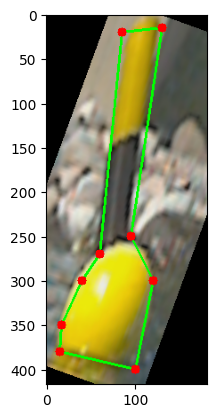

In [30]:

buoy_angle = 20
buoy = ndimage.rotate(buoy, -buoy_angle, reshape=False)
buoy = cv2.resize(buoy, ground_truth_res)


keypoints = np.array([(15, 380), (17, 350), (40, 300), (60, 270), (85, 20), (130, 15), (95, 250), (120, 300), (100, 400)], np.int32)
keypoints = keypoints.reshape((-1, 1, 2))


buoy_drawn = np.copy(buoy)
cv2.polylines(buoy_drawn, [keypoints], isClosed=True, color=(0, 255, 0), thickness=2)

for point in keypoints:
    cv2.circle(buoy_drawn, tuple(point[0]), 5, color=(255, 0, 0), thickness=-1)

plt.imshow(buoy_drawn)
plt.show()

(417, 182, 3)
(417, 182, 3)


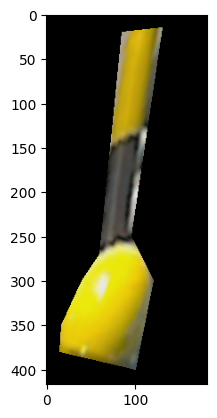

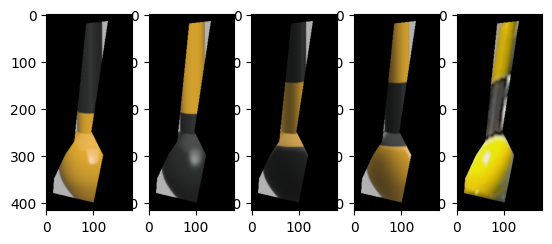

In [31]:
# get a mask from the keypoints, then show original image where mask is true, and leave black elsewhere
mask = np.zeros(buoy.shape, dtype=np.uint8)
cv2.fillPoly(mask, [keypoints], color=(255, 255, 255))

buoy_masked = np.copy(buoy)
buoy_masked[mask == 0] = 0
plt.imshow(buoy_masked)
print(buoy.shape)
print(north.shape)


north_masked = np.copy(north)
north_masked[mask == 0] = 0

south_masked = np.copy(south)
south_masked[mask == 0] = 0

east_masked = np.copy(east)
east_masked[mask == 0] = 0

west_masked = np.copy(west)
west_masked[mask == 0] = 0

fig, axs = plt.subplots(1, 5)
axs[0].imshow(north_masked)
axs[1].imshow(south_masked)
axs[2].imshow(east_masked)
axs[3].imshow(west_masked)
buoy_masked = cv2.resize(buoy_masked, ground_truth_res)
axs[4].imshow(buoy_masked)


In [32]:
names = ("north", "south", "east", "west")
buoys = (north_masked, south_masked, east_masked, west_masked)
costs = []
lowest_cost = np.inf

# compare the masked buoy to each of the masked reference buoys
for i, ref_buoy in enumerate(buoys):
    cost = np.sum(np.abs(buoy_masked - ref_buoy))
    costs.append(cost)
    if cost < lowest_cost:
        lowest_cost = cost
        lowest_cost_idx = i

print(costs)

[7261658, 8320822, 8867142, 6943405]


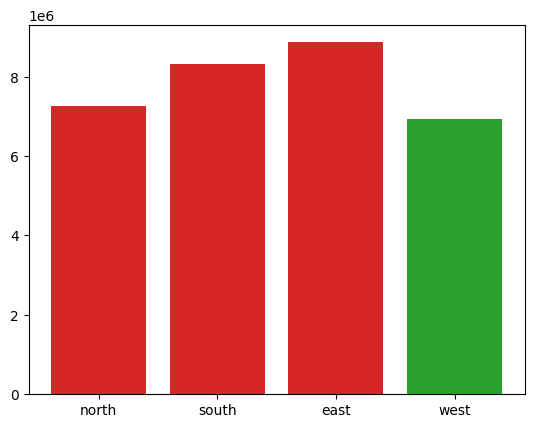

In [33]:
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:red', 'tab:red', 'tab:red']
bar_colors[lowest_cost_idx] = 'tab:green'

ax.bar(names, costs, color=bar_colors)
plt.show()